In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [31]:
iris = pd.read_csv("Iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
# x = iris.iloc[:,1:5]

x = iris.drop(columns=["Id","Species"])

x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7977499371a0>
Traceback (most recent call last):
  File "/home/user/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/user/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                

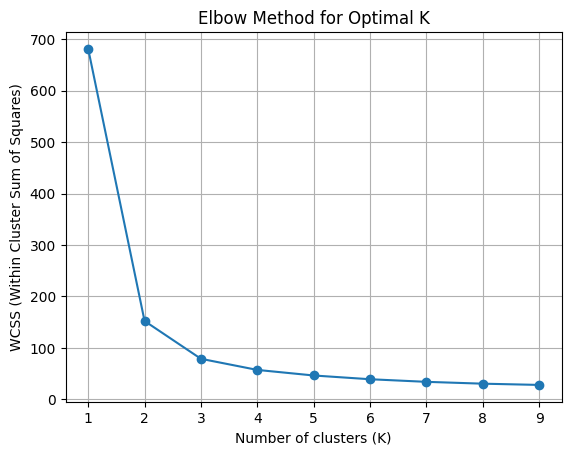

In [32]:
# K Means

# Deciding Value of K
# The most crucial aspect of K-Means clustering is deciding the value of K
# We do this by performing Elbow Analysis 




wcss = []
k_values = list(range(1, 10))

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    # print("For cluster = {}, SSE/WCSS is {}".format(k, kmeans.inertia_))

plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.grid(True)
plt.show()

    

In [33]:
# Running K-Means Model

# We now run K-Means clustering for obtaining a 3 cluster solution.


kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(x)
iris["cluster"] = kmeans.labels_

/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x797749e73e20>
Traceback (most recent call last):
  File "/home/user/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/user/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                

In [40]:
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
82,83,5.8,2.7,3.9,1.2,Iris-versicolor,2
60,61,5.0,2.0,3.5,1.0,Iris-versicolor,2
49,50,5.0,3.3,1.4,0.2,Iris-setosa,1
61,62,5.9,3.0,4.2,1.5,Iris-versicolor,2
23,24,5.1,3.3,1.7,0.5,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
125,126,7.2,3.2,6.0,1.8,Iris-virginica,0
57,58,4.9,2.4,3.3,1.0,Iris-versicolor,2
74,75,6.4,2.9,4.3,1.3,Iris-versicolor,2
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,0
